In [0]:
from google.colab import files
uploaded = files.upload()


Saving HTRU_2.csv to HTRU_2.csv


In [0]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

ds = np.loadtxt("pulsar_stars.csv", delimiter = ",", skiprows =1)
ts = np.loadtxt("HTRU_2.csv", delimiter = ",", skiprows =1)


In [0]:
print(ds[0:5])
print("------------------------------------------------------------------------------------")
print(ts[0:5])

[[ 1.40562500e+02  5.56837821e+01 -2.34571412e-01 -6.99648398e-01
   3.19983278e+00  1.91104263e+01  7.97553179e+00  7.42422249e+01
   0.00000000e+00]
 [ 1.02507812e+02  5.88824300e+01  4.65318154e-01 -5.15087909e-01
   1.67725752e+00  1.48601457e+01  1.05764867e+01  1.27393580e+02
   0.00000000e+00]
 [ 1.03015625e+02  3.93416494e+01  3.23328365e-01  1.05116443e+00
   3.12123746e+00  2.17446687e+01  7.73582202e+00  6.31719091e+01
   0.00000000e+00]
 [ 1.36750000e+02  5.71784487e+01 -6.84146380e-02 -6.36238369e-01
   3.64297659e+00  2.09592803e+01  6.89649891e+00  5.35936607e+01
   0.00000000e+00]
 [ 8.87265625e+01  4.06722254e+01  6.00866079e-01  1.12349169e+00
   1.17892977e+00  1.14687196e+01  1.42695728e+01  2.52567306e+02
   0.00000000e+00]]
------------------------------------------------------------------------------------
[[ 1.02507812e+02  5.88824300e+01  4.65318154e-01 -5.15087909e-01
   1.67725752e+00  1.48601457e+01  1.05764867e+01  1.27393580e+02
   0.00000000e+00]
 [ 1.030

In [0]:
print(ds.shape)
print(ts.shape)

(17898, 9)
(17897, 9)


In [0]:
print(ds[0:10,:])

[[ 1.40562500e+02  5.56837821e+01 -2.34571412e-01 -6.99648398e-01
   3.19983278e+00  1.91104263e+01  7.97553179e+00  7.42422249e+01
   0.00000000e+00]
 [ 1.02507812e+02  5.88824300e+01  4.65318154e-01 -5.15087909e-01
   1.67725752e+00  1.48601457e+01  1.05764867e+01  1.27393580e+02
   0.00000000e+00]
 [ 1.03015625e+02  3.93416494e+01  3.23328365e-01  1.05116443e+00
   3.12123746e+00  2.17446687e+01  7.73582202e+00  6.31719091e+01
   0.00000000e+00]
 [ 1.36750000e+02  5.71784487e+01 -6.84146380e-02 -6.36238369e-01
   3.64297659e+00  2.09592803e+01  6.89649891e+00  5.35936607e+01
   0.00000000e+00]
 [ 8.87265625e+01  4.06722254e+01  6.00866079e-01  1.12349169e+00
   1.17892977e+00  1.14687196e+01  1.42695728e+01  2.52567306e+02
   0.00000000e+00]
 [ 9.35703125e+01  4.66981135e+01  5.31904850e-01  4.16721117e-01
   1.63628763e+00  1.45450743e+01  1.06217484e+01  1.31394004e+02
   0.00000000e+00]
 [ 1.19484375e+02  4.87650593e+01  3.14602200e-02 -1.12167573e-01
   9.99163880e-01  9.2796122

In [0]:
print(np.max(ds[:,8]))
print(np.min(ds[:,8]))

1.0
0.0


**Now, We split the data**

In [0]:
ds_train = ds[0:8949,:]
ds_test = ds[8949:,:]
ts_test = ts[0:30,:]
print(ds_train.shape)
print(ds_test.shape)

(8949, 9)
(8949, 9)


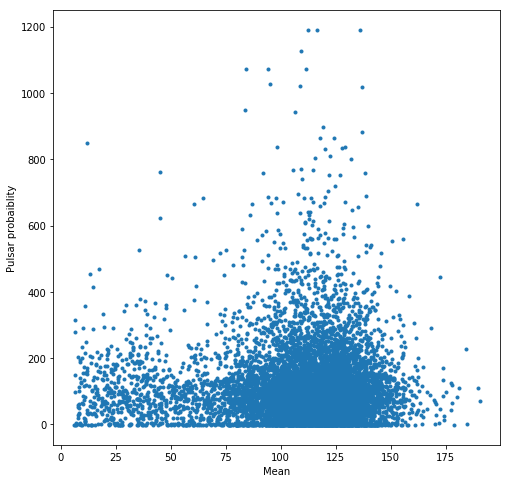

In [0]:
plt.figure(figsize=(8,8))
plt.plot(ds_train[:,0],ds_test[:,7],'.')
plt.xlabel("Mean")
plt.ylabel("Pulsar probaiblity")
plt.show()

In [0]:
x_train = ds_train[:,0:8]
y_train = ds_train[:,8]
x_test = ds_test[:,0:8]
y_test = ds_test[:,8]
ts_test_y = ts_test[:,8]
ts_test_x = ts_test[:,0:8]
print("X and Y data is split")

X and Y data is split


In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8949, 8)
(8949, 8)
(8949,)
(8949,)


Normalizing the data

In [0]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

mean = ts_test_x.mean(axis=0)
ts_test_x -= mean
std = ts_test_x.std(axis=0)
ts_test_x /= std

In [0]:
model = Sequential()
model.add(Dense(12,input_dim = 8, activation = "linear"))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_11 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 13        
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(loss='mse', optimizer='sgd', metrics=['mae'])

In [0]:
history = model.fit(x_train,y_train,epochs = 256, verbose=1,batch_size =32,validation_data=(x_test,y_test))
score = model.evaluate(ts_test_x, ts_test_y, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Train on 8949 samples, validate on 8949 samples
Epoch 1/256
8949/8949 [==============================] - 1s 70us/step - loss: 0.0822 - mean_absolute_error: 0.1486 - val_loss: 0.0254 - val_mean_absolute_error: 0.0930
Epoch 2/256
8949/8949 [==============================] - 0s 48us/step - loss: 0.0389 - mean_absolute_error: 0.1096 - val_loss: 0.0213 - val_mean_absolute_error: 0.0819
Epoch 3/256
8949/8949 [==============================] - 0s 47us/step - loss: 0.0358 - mean_absolute_error: 0.1028 - val_loss: 0.0205 - val_mean_absolute_error: 0.0788
Epoch 4/256
8949/8949 [==============================] - 0s 50us/step - loss: 0.0337 - mean_absolute_error: 0.0978 - val_loss: 0.0190 - val_mean_absolute_error: 0.0750
Epoch 5/256
8949/8949 [==============================] - 0s 47us/step - loss: 0.0322 - mean_absolute_error: 0.0945 - val_loss: 0.0179 - val_mean_absolute_error: 0.0711
Epoch 6/256
8949/8949 [==============================] - 0s 42us/step - loss: 0.0310 - mean_absolute_error: 0.09

In [0]:
prediction = model.predict(ts_test_x)
print(prediction[:])

[[1.2430215e-01]
 [4.8895329e-02]
 [8.3446503e-07]
 [9.8806667e-01]
 [8.5453790e-01]
 [6.8247318e-06]
 [2.6226044e-06]
 [3.1655300e-01]
 [8.6742771e-01]
 [5.6624413e-07]
 [1.5003383e-02]
 [3.4515649e-02]
 [2.7450371e-01]
 [7.5425029e-02]
 [2.3734748e-02]
 [3.0083656e-02]
 [4.0436757e-01]
 [4.9571812e-02]
 [9.9194843e-01]
 [7.7070463e-01]
 [1.0551992e-01]
 [1.9061393e-01]
 [2.3809522e-01]
 [1.8385604e-01]
 [3.7792638e-01]
 [3.1844702e-02]
 [1.7919384e-02]
 [3.2713108e-02]
 [7.2119132e-02]
 [3.9128181e-02]]


In [0]:
print(ts_test_y[:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [0]:
print(np.max(prediction[:]))

0.9999987
